In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [5]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [6]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf2,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


[13.33333333  0.96666667]


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


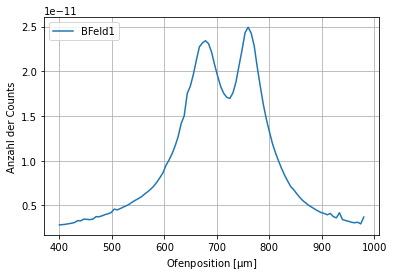

In [7]:
xcalib = [(400,1000),(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(400,985),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

for  i in range(len(xcalib)-10):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    print(popt)
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)

In [28]:
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-np.abs(x-mu1)**2/sigma1)
        + b * np.exp(-np.abs(x-mu2)**2/sigma2)
    )

In [29]:
def fitdoublegaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    print(popt1)
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit")
    plt.legend(loc=0)
    plt.savefig("doublegauß.png")

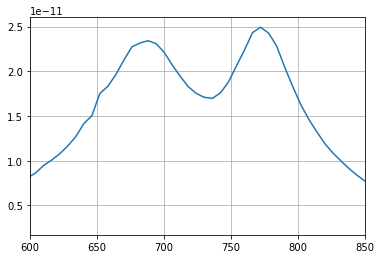

In [30]:
plt.plot(bf1[:,0],bf1[:,1])
plt.xlim(600,850)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

[1.75703867e-11 6.81938561e+02 3.67454323e+03 1.71550886e-11
 7.80519508e+02 1.95130457e+03 4.32601793e-12]


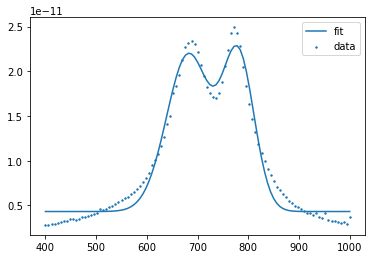

In [33]:
fitdoublegaussian(bf1, (2e-11, 685, 70, 
                          2e-11, 775, 40, 3e-12))